<center><div style="font-family: Times New Roman; font-size: 25px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">Menampilkan Citra Gambar sebagai Array NumPy + Heatmap </div></center>


<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">Import Library </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">1. Membaca Gambar Asli </div>

In [ ]:
img = Image.open("foto.png")

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">2. Konversi Gambar ke Array NumPy </div>

In [ ]:
img_array=np.array(img)

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">3. Tampilkan Gambar Asli </div>

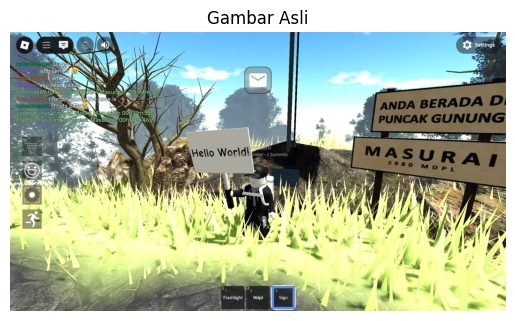

In [ ]:
plt.imshow(img_array)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">4. Visualisasi Channel RGB dgn Heatmap </div>

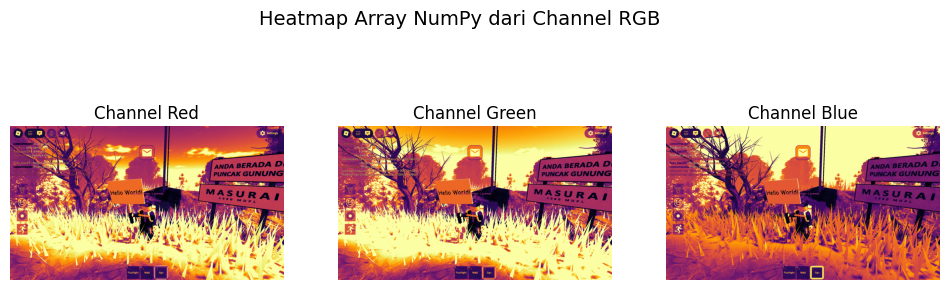

In [ ]:
fig, axes=plt.subplots(1, 3, figsize=(12, 4))
channels=["Red","Green", "Blue"]

for i, ax in enumerate(axes):
    ax.imshow(img_array[:, :, i], cmap="inferno")
    ax.set_title(f"Channel {channels[i]}")
    ax.axis("off")

plt.suptitle("Heatmap Array NumPy dari Channel RGB", fontsize=14)
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">5. Konversi ke Grayscale </div>

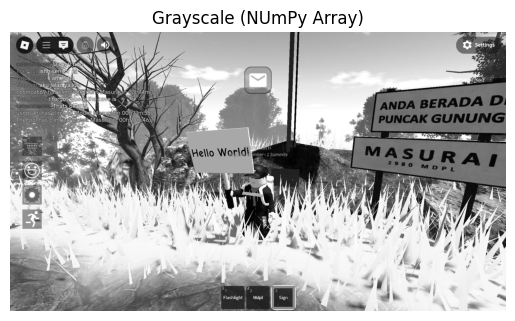

In [ ]:
gray=0.299*img_array[:,:,0] + 0.587*img_array[:,:,1] + 0.114*img_array[:,:,2]
plt.imshow(gray, cmap="gray")
plt.title("Grayscale (NUmPy Array)")
plt.axis("off")
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">6. Edge Detection Sederhana </div>

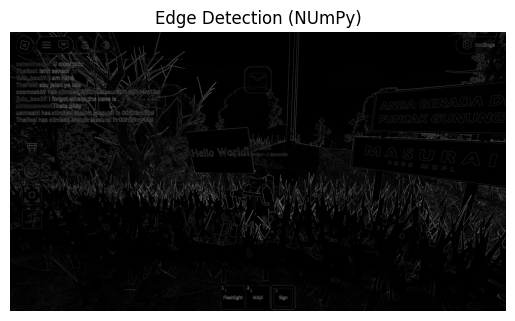

In [11]:
diff_x=np.abs(np.diff(gray, axis=1))    #tepi horizontal
diff_y=np.abs(np.diff(gray, axis=0))    #tepi vertkal

# pad agar ukuran sama dengan gray
diff_x=np.pad(diff_x, ((0, 0), (0, 1)), mode="constant")
diff_y=np.pad(diff_y, ((0, 1), (0, 0)), mode="constant")

edges=diff_x + diff_y

plt.imshow(edges, cmap="gray")
plt.title("Edge Detection (NUmPy)")
plt.axis("off")
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">7. Manipulasi Array (Flip & Rotate) </div>

(np.float64(-0.5), np.float64(1079.5), np.float64(1919.5), np.float64(-0.5))

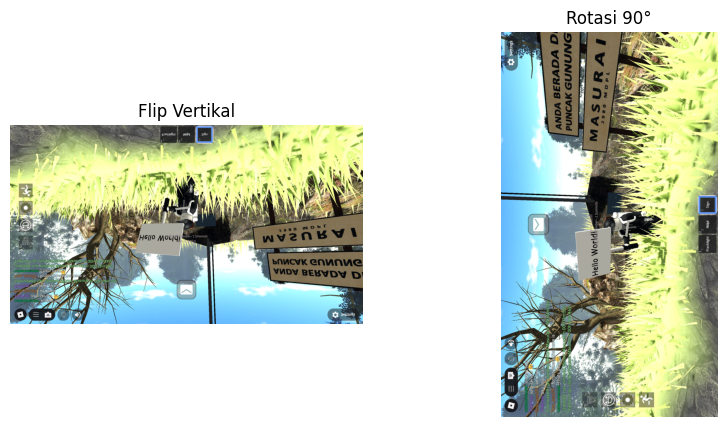

In [10]:
flipped=np.flipud(img_array)
rotated=np.rot90(img_array)

fig, axes=plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(flipped)
axes[0].set_title("Flip Vertikal")
axes[0].axis("off")

axes[1].imshow(rotated)
axes[1].set_title("Rotasi 90°")
axes[1].axis("off")

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">8. Perubahan Brightness </div>

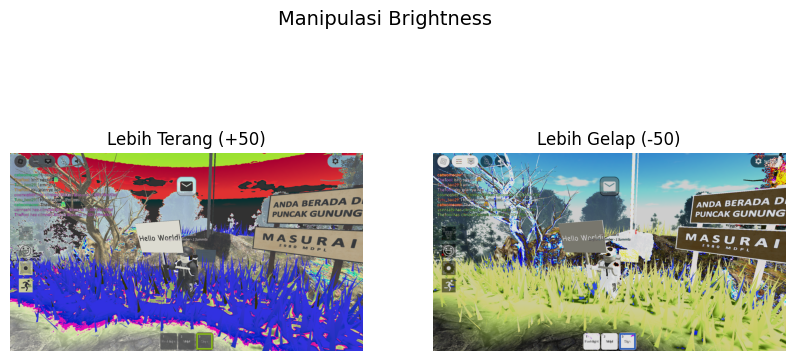

In [12]:
brighter=np.clip(img_array + 50, 0, 225).astype(np.uint8)
darker  =np.clip(img_array - 50, 0, 225).astype(np.uint8)

fig, axes=plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(brighter)
axes[0].set_title("Lebih Terang (+50)")
axes[0].axis("off")

axes[1].imshow(darker)
axes[1].set_title("Lebih Gelap (-50)")
axes[1].axis("off")

plt.suptitle("Manipulasi Brightness", fontsize=14)
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">9. Crop and Resize </div>

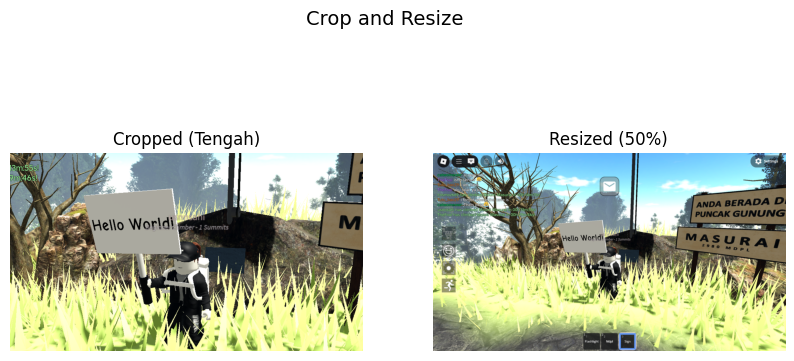

In [13]:
# crop and resize
h, w=img_array.shape[:2]
cropped=img_array[h//4:3*h//4, w//4:3*w//4]
resized=np.array(Image.fromarray(img_array).resize((w//2, h//2)))

fig, axes=plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cropped)
axes[0].set_title("Cropped (Tengah)")
axes[0].axis("off")

axes[1].imshow(resized)
axes[1].set_title("Resized (50%)")
axes[1].axis("off")

plt.suptitle("Crop and Resize", fontsize=14)
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">10. Tambahkan Gaussian Noise </div>

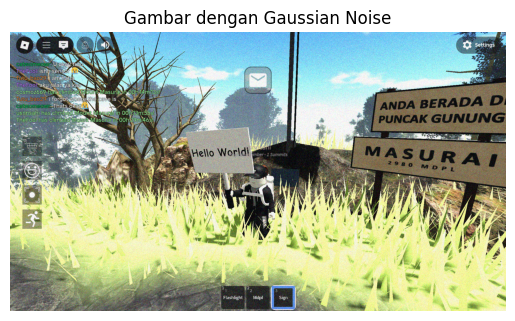

In [14]:
noise=np.random.normal(0, 25, img_array.shape)      #mean=0, std=25
noisy_img=np.clip(img_array + noise, 0, 255).astype(np.uint8)

plt.imshow(noisy_img)
plt.title("Gambar dengan Gaussian Noise")
plt.axis("off")
plt.show()

<div style="font-family: Times New Roman; font-size: 20px; border-radius : 10px; background-color:rgb(253, 250, 250); color:rgb(0, 25, 135); padding: 12px; line-height: 0.7;">11. Thresholding (Binerisasi) </div>

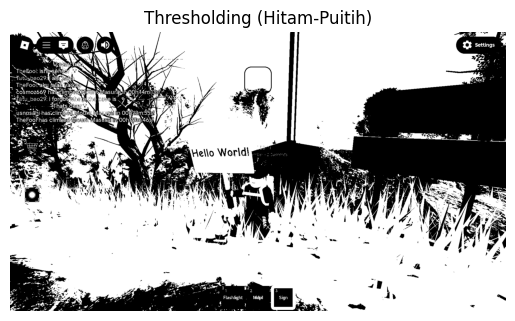

In [15]:
threshold=(gray > 128).astype(np.uint8) * 255

plt.imshow(threshold, cmap="gray")
plt.title("Thresholding (Hitam-Puitih)")
plt.axis("off")
plt.show()